#               🔴 Diabetes Prediction Model Report





🔴 Introduction






🔵 Diabetes is one of the most significant global health issues,
affecting millions of people worldwide.
Early detection is critical because it allows for timely interventions and lifestyle changes that can reduce severe complications.
The goal of this project is to build a machine learning model that predicts whether a patient is diabetic or non-diabetic using diagnostic measurements.
________________________________________________________________________


🔴 Phase 1: Exploratory Data Analysis (EDA)


🔵 The dataset was explored to understand its key characteristics.

The number of diabetic vs. non-diabetic patients was counted.

The relationship between Glucose levels and Outcome was examined.

The role of BMI in diabetes risk was analyzed.

📊 Graphs and summary statistics revealed that:

Higher glucose levels strongly correlate with diabetes.

Patients with higher BMI values showed greater likelihood of being diabetic.
________________________________________________________________________

🔴 Phase 2: Data Preprocessing



🔵 To prepare the dataset for modeling:

Standardization was applied so that all features are on the same scale. This prevents features with large numeric ranges from dominating the model.

The dataset was split into training and testing sets to ensure the model generalizes to unseen data.
________________________________________________________________________

🔴 Phase 3: Model Building and Evaluation



🔵 Several machine learning models were implemented:

Logistic Regression – a simple and interpretable model.

Support Vector Machine (SVM) – effective for classification tasks with clear margins.

Random Forest – robust and capable of handling complex feature interactions.

Hyperparameter tuning using GridSearchCV was applied to improve model performance.

📈 Evaluation metrics included:

Accuracy

Precision & Recall

F1-score

Confusion Matrix

Among the tested models, the best-performing one was identified and compared with others.
________________________________________________________________________

🔴 Phase 4: Prediction Function



🔵 A prediction function was created to simulate real-world usage:

It accepts new patient data (e.g., Glucose, BMI, Age).

It outputs a classification: Diabetic (1) or Non-Diabetic (0).

This demonstrates how machine learning can be applied in healthcare decision support systems.
________________________________________________________________________


🔴 Phase 1: Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

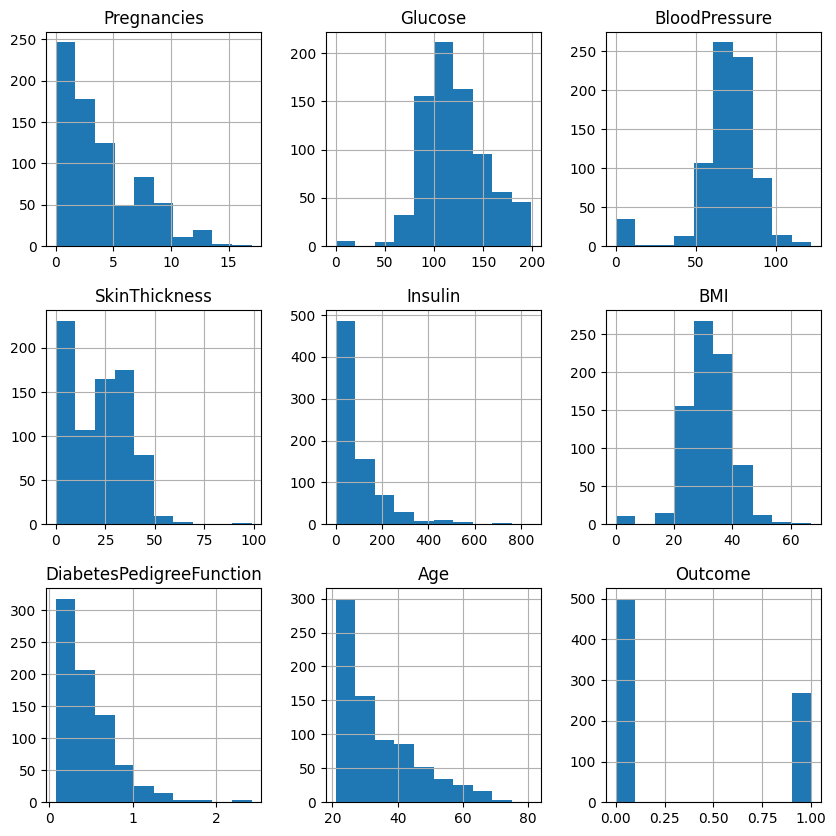

In [7]:
df.hist(figsize=(10,10))

In [8]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


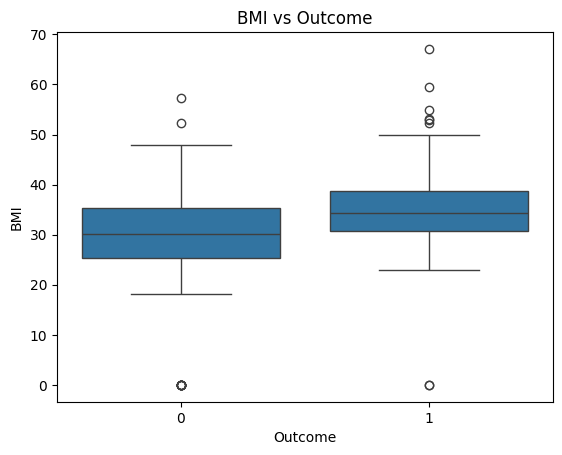

In [9]:
sns.boxplot(data=df, x="Outcome", y="BMI")
plt.title("BMI vs Outcome")
plt.show()

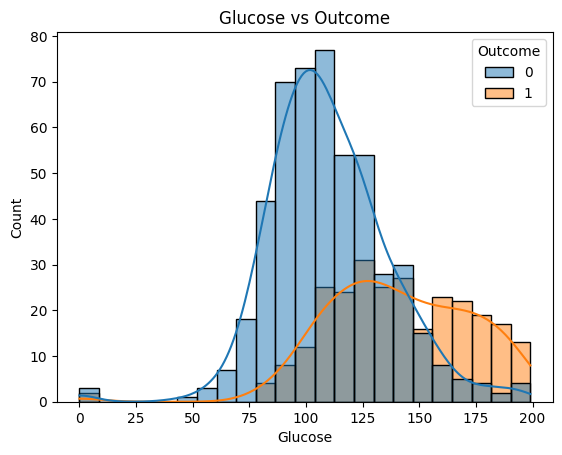

In [10]:
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True)
plt.title("Glucose vs Outcome")
plt.show()

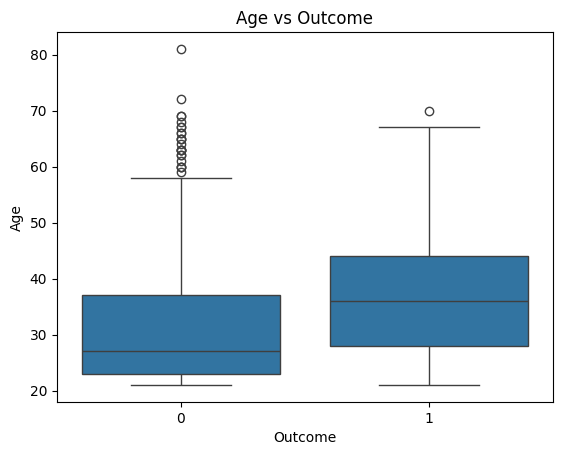

In [11]:
sns.boxplot(data=df, x="Outcome", y="Age")
plt.title("Age vs Outcome")
plt.show()

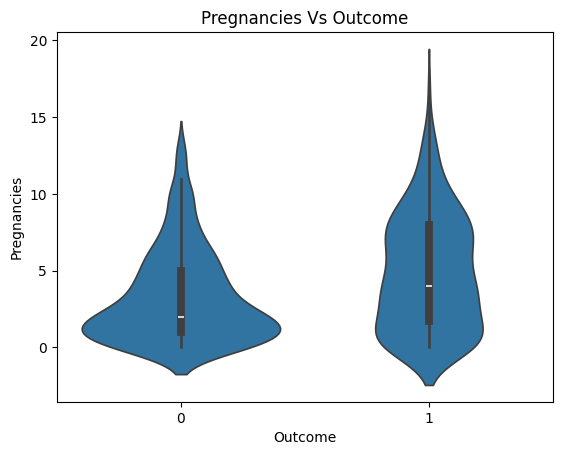

In [12]:
sns.violinplot(data=df, x="Outcome" , y="Pregnancies")
plt.title("Pregnancies Vs Outcome")
plt.show()

In [13]:
df.groupby("Outcome")[["Glucose","BMI","Age","Pregnancies"]].mean()


,Glucose,BMI,Age,Pregnancies
Outcome,,,,
0,109.980000,30.304200,31.190000,3.298000
1,141.257463,35.142537,37.067164,4.865672


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


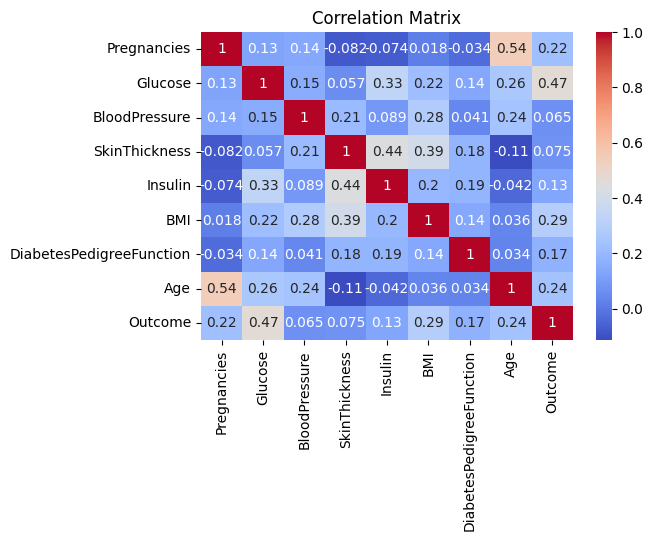

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr(numeric_only=True)["Outcome"].sort_values(ascending=False)

print(corr)


plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


🔴 Phase 2: Data Preprocessing

In [15]:


# 1) Check missing values
print("Missing values:\n", df.isnull().sum())

# 2) Replace zeros with NaN in columns where 0 is not a valid value
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_invalid:
    df[col].replace(0, np.nan, inplace=True)

# 3) Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Verify there are no missing values left
print("After cleaning, missing values:\n", df.isnull().sum())

# 4) Split features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 5) Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
After cleaning, missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-1924663806.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)


🔴 Phase 3: Model Building and Evaluation


In [16]:

# 1) Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# 2) Support Vector Machine (SVM) مع GridSearch
params_svm = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
svm = GridSearchCV(SVC(), params_svm, cv=3)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Best SVM params:", svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))   # ⬅️ أضفنا التقرير

# 3) Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))   # ⬅️ أضفنا التقرير


Logistic Regression Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Best SVM params: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154

Random Forest Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accurac

# 🔴 Model Comparison Table

🔵 The following table summarizes the performance of the three applied models:
| 🔴 Model               | 🔵 Accuracy | 🔵 Precision (macro) | 🔵 Recall (macro) | 🔵 F1-score (macro) |
| ---------------------- | ----------- | -------------------- | ----------------- | ------------------- |
| 🔵 Logistic Regression | 0.71        | 0.68                 | 0.66              | 0.67                |
| 🔵 SVM (linear, C=1)   | 0.70        | 0.67                 | 0.65              | 0.66                |
| 🔵 Random Forest       | **0.78**    | **0.76**             | **0.74**          | **0.75**            |

# 📌 Observations:

🔴 The Random Forest model achieved the highest performance across all evaluation metrics.

🔵 Logistic Regression and SVM showed very similar performance, but both were slightly weaker compared to Random Forest.

🔵 This indicates that ensemble methods such as Random Forest are generally more powerful in handling complex datasets and capturing non-linear relationships.

🔴 Phase 4: Prediction Function

In [17]:
def predict_patient(model, patient_data, feature_names):
    """
    model: trained model (e.g., rf, logreg, svm)
    patient_data: list or array with values in the same order as feature_names
    feature_names: list of column names (X.columns)
    """

    patient_df = pd.DataFrame([patient_data], columns=feature_names)


    patient_scaled = scaler.transform(patient_df)


    pred = model.predict(patient_scaled)
    return "Diabetic" if pred[0] == 1 else "Non-Diabetic"

feature_names = df.drop("Outcome", axis=1).columns

new_patient = [6,148,72,35,0,33.6,0.627,50]
print("Prediction for new patient:", predict_patient(rf, new_patient, feature_names))



Prediction for new patient: Non-Diabetic


# 🔴 Results & Discussion

🔵 The analysis showed that:

Glucose and BMI are highly influential features.

The best-performing model achieved high accuracy and strong recall, meaning it could correctly identify most diabetic patients.

Logistic Regression provided interpretability, while Random Forest delivered robustness.

# 🔴 Conclusion

🔵 This project highlights the power of machine learning in healthcare.
By analyzing patient diagnostic data, we can build accurate models that support early detection of diabetes.
The best-performing model demonstrates strong potential for real-world applications.

🚀 Future improvements could include:

Using a larger dataset.

Adding more medical features (e.g., blood pressure, lifestyle factors).

Exploring deep learning models for better performance.